In [1]:
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set_style("dark")
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(15,8)})

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas_datareader.data import DataReader
import datetime as dt


# Time series
from statsmodels.tsa.seasonal import seasonal_decompose

#metrics
from sklearn.metrics import mean_squared_error

# custom functions
import functions

ModuleNotFoundError: No module named 'functions'

# 1 Year

In [ ]:
stock_data = pd.read_csv('../data/stock/NFLX_1year.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-04,513.000000,517.979980,510.369995,517.349976,517.349976,2039400
1,2021-08-05,517.130005,525.409973,514.020020,524.890015,524.890015,2556700
2,2021-08-06,524.000000,526.840027,519.390015,520.549988,520.549988,1919800
3,2021-08-09,521.150024,522.669983,517.989990,519.969971,519.969971,1367800
4,2021-08-10,520.000000,520.789978,512.969971,515.840027,515.840027,1960500


In [ ]:
# setting the index as the date
stock_data.set_index('Date', inplace=True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-04,513.000000,517.979980,510.369995,517.349976,517.349976,2039400
2021-08-05,517.130005,525.409973,514.020020,524.890015,524.890015,2556700
2021-08-06,524.000000,526.840027,519.390015,520.549988,520.549988,1919800
2021-08-09,521.150024,522.669983,517.989990,519.969971,519.969971,1367800
2021-08-10,520.000000,520.789978,512.969971,515.840027,515.840027,1960500


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-29,223.289993,230.750000,222.399994,224.899994,224.899994,9060500
2022-08-01,223.100006,228.389999,221.000000,226.210007,226.210007,5525000
2022-08-02,222.759995,228.199997,220.880005,221.419998,221.419998,6361300
2022-08-03,224.789993,228.100006,222.419998,226.729996,226.729996,6393200
2022-08-04,227.679993,232.070007,225.110001,227.709793,227.709793,3700278


In [ ]:
# Check description of features
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,429.020236,435.598023,421.527036,428.556046,428.556046,7.933552e+06
std,180.233812,181.027790,179.067182,179.819426,179.819426,1.103552e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,220.000000,226.270004,211.639999,218.509995,218.509995,3.077800e+06
50%,402.100006,409.359985,395.829987,403.529999,403.529999,5.035000e+06
75%,598.710022,609.450012,593.669983,599.059998,599.059998,8.522100e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [ ]:
# We will focus on the closing price

closing_price = stock_data['Adj Close']

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

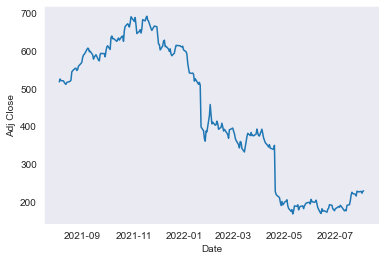

In [ ]:
# We have some very unusual activity, due to the recent challenges faced by the company, it would be interesting to consider the news / social sentiment at that time.

sns.lineplot(data=closing_price)

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

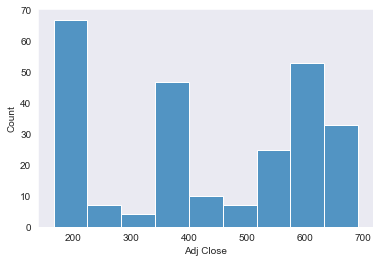

In [ ]:
# Closing price is not gaussian
sns.histplot(data=closing_price)

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

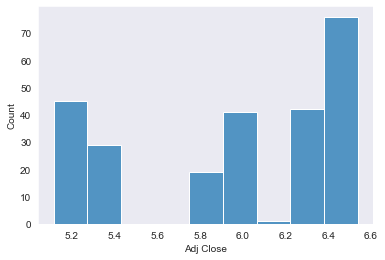

In [ ]:
# Does log help?
closing_log = np.log(closing_price)
sns.histplot(data=closing_log)

<AxesSubplot:ylabel='Count'>

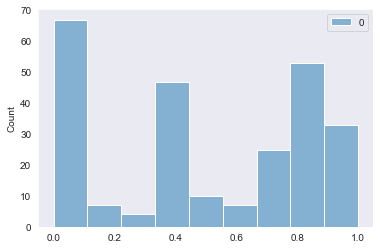

In [ ]:
# nope, let's scale it. Nope, doesn't help
scaler = MinMaxScaler()
closing_minmax = scaler.fit_transform(closing_price.values.reshape(-1,1))
# scaler.inverse_transform(closing_minmax)
sns.histplot(closing_minmax)

# 5 Year

There's clearly things happening in the past year that we can't predict with the price alone.
Let's take a more normal trend as a baseline, and see if we can improve performance on
this abnormal data with more features later.

In [ ]:
five_yr_stock = pd.read_csv('../data/stock/NFLX_5year.csv')
five_yr_stock.set_index('Date', inplace=True)
five_yr_stock.index = pd.to_datetime(five_yr_stock.index)
five_yr_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,179.600006,181.000000,178.500000,180.270004,180.270004,4491100
2017-08-07,181.000000,182.270004,179.100006,181.330002,181.330002,4609800
2017-08-08,181.369995,181.910004,177.449997,178.360001,178.360001,6104000
2017-08-09,171.429993,175.960007,170.009995,175.779999,175.779999,9670500
2017-08-10,174.029999,174.449997,167.600006,169.139999,169.139999,9693100


In [ ]:
# Check for null
five_yr_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-08-04 to 2022-08-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
five_yr_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,381.709595,387.534562,375.478013,381.666717,381.666717,7.881583e+06
std,127.377456,128.550928,125.920802,127.131821,127.131821,6.707878e+06
min,163.960007,168.669998,162.710007,165.949997,165.949997,1.144000e+06
25%,295.000000,299.045006,289.845001,294.207497,294.207497,4.328175e+06
50%,362.110001,367.364990,356.625000,361.865005,361.865005,6.114950e+06
75%,495.000000,502.992500,487.775002,494.557503,494.557503,9.408100e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

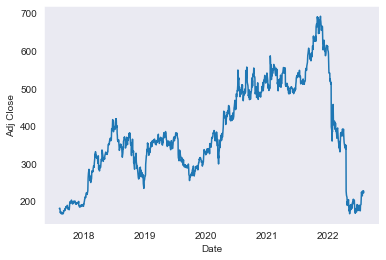

In [ ]:
five_close = five_yr_stock['Adj Close']
sns.lineplot(data=five_close)

In [ ]:
type(five_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

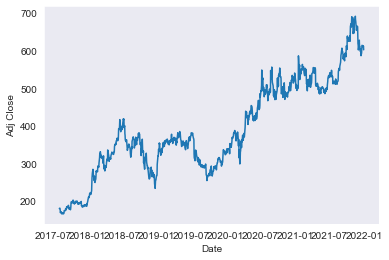

In [ ]:
# We will start not considering 2022 data for our baseline
main_price = five_close.loc[:'2022-01-01']
sns.lineplot(data=main_price)

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

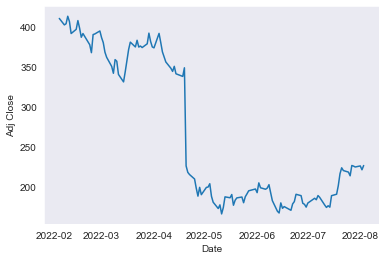

In [ ]:
sixmo = five_close.loc['2022-02-04':]
sns.lineplot(data=sixmo)

In [ ]:
# Let's export the main dataset for use in XGBoost

main_price = five_close.loc[:'2022-01-01']

# Decomposition

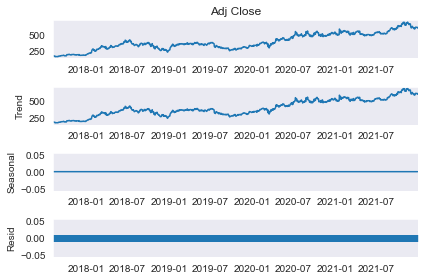

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

# automatic decomposition doesn't work
result = seasonal_decompose(main_price, model='additive', period=1)
result.plot()
pyplot.show()

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

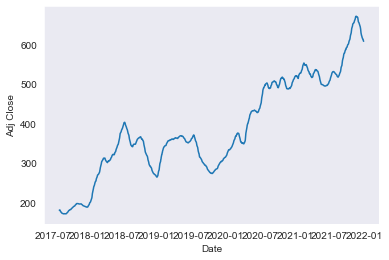

In [ ]:
# Calculate rolling average
rolling = main_price.rolling(window='30D')
rolling_mean = rolling.mean()
sns.lineplot(data=rolling_mean)

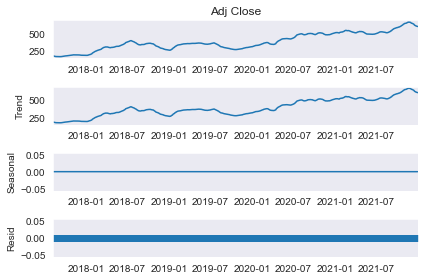

In [ ]:
# still no trendline for rolling average
result = seasonal_decompose(rolling_mean, model='additive', period=1)
result.plot()
pyplot.show()

In [ ]:
# export five year stock for the main timeframe
main_stock = five_yr_stock.loc[:'2022-01-01']
main_stock.to_csv('../data/stock/main_stock.csv')

# Rolling Mean Baseline

In [ ]:
def rolling_mean_prediction(series, window):
    """
    Takes a time series and a window (int) to predict the value that follows the window.
    returns an array of predictions and prints plots
    """
    X = series.values
    window=window
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = np.mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    # zoom plot
    pyplot.plot(test[0:100])
    pyplot.plot(predictions[0:100], color='red')
    pyplot.show()
    return predictions

predicted=175.325714, expected=168.500000
predicted=173.644285, expected=169.979996
predicted=172.022856, expected=166.089996
predicted=170.269998, expected=166.539993
predicted=168.949997, expected=166.759995
predicted=168.609996, expected=169.339996
predicted=168.315711, expected=169.059998
predicted=168.038568, expected=168.130005
predicted=167.985711, expected=165.949997
predicted=167.409997, expected=167.119995
predicted=167.557140, expected=168.809998
predicted=167.881426, expected=174.690002
predicted=169.014284, expected=174.710007
predicted=169.781429, expected=174.740005
predicted=170.592858, expected=174.520004
predicted=171.505715, expected=179.250000
predicted=173.405716, expected=179.000000
predicted=175.102859, expected=176.419998
predicted=176.190002, expected=181.740005
predicted=177.197146, expected=185.149994
predicted=178.688572, expected=183.639999
predicted=179.960000, expected=182.630005
predicted=181.118572, expected=182.350006
predicted=181.561430, expected=184

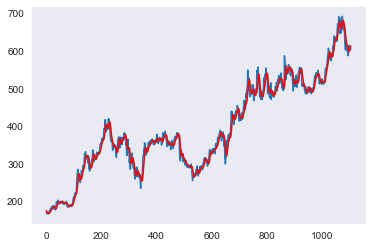

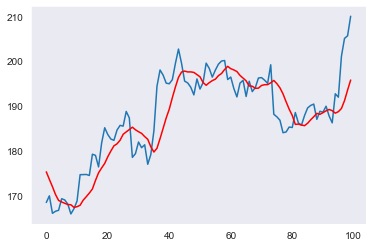

[175.32571414285712,
 173.644285,
 172.02285557142858,
 170.2699977142857,
 168.94999685714288,
 168.6099962857143,
 168.31571085714288,
 168.03856771428573,
 167.9857112857143,
 167.40999714285712,
 167.55713985714286,
 167.8814262857143,
 169.01428442857144,
 169.78142885714286,
 170.59285842857145,
 171.50571542857142,
 173.40571585714287,
 175.10285942857143,
 176.19000228571431,
 177.1971455714286,
 178.6885722857143,
 179.95999999999998,
 181.11857157142853,
 181.56142957142856,
 182.364286,
 183.6871424285714,
 184.22571242857143,
 184.74428457142858,
 185.2742855714286,
 184.69142814285715,
 184.26714228571427,
 183.8885717142857,
 183.17714371428568,
 182.5828595714286,
 180.9014304285714,
 179.73571557142859,
 180.57857185714286,
 182.72285671428568,
 185.01571428571427,
 187.325714,
 189.28714199999996,
 191.8499994285714,
 194.23142785714285,
 196.38000042857144,
 197.56428528571428,
 197.77285557142858,
 197.5828552857143,
 197.5899985714286,
 197.47714242857143,
 196.9928

In [ ]:
rolling_mean_prediction(main_price, window=7)

# FB Prophet